# Import and Preprocess Data

In [ ]:
from tensorflow.keras.optimizers import RMSprop
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
!gdown 1tpvQ4P3t0MWGUr43Kq3B397zvC8mxU63

Downloading...
From: https://drive.google.com/uc?id=1tpvQ4P3t0MWGUr43Kq3B397zvC8mxU63
To: /content/photos_batch2.zip
100% 452M/452M [00:04<00:00, 110MB/s] 


In [ ]:
!gdown 1OEF0KJoBXJdQNP_SPBAnHW_xfh8rvv5-

Downloading...
From: https://drive.google.com/uc?id=1OEF0KJoBXJdQNP_SPBAnHW_xfh8rvv5-
To: /content/Salinan photos_revised.zip
100% 410M/410M [00:04<00:00, 85.3MB/s]


In [ ]:
local_zip = '/content/Salinan photos_revised.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
local_zip = '/content/photos_batch2.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
path_ori = '/tmp/photos'

In [ ]:
source_path_baterai = os.path.join(path_ori, 'batu baterai')
source_path_cap = os.path.join(path_ori, 'cap')
source_path_cookset = os.path.join(path_ori, 'cooking set hike')
source_path_medis = os.path.join(path_ori, 'first aid kit')
source_path_gelas = os.path.join(path_ori, 'gelas plastik')
source_path_topi = os.path.join(path_ori, 'hat')
source_path_headlamp = os.path.join(path_ori, 'headlamp climbing')
source_path_pisau = os.path.join(path_ori, 'knife')
source_path_lampu = os.path.join(path_ori, 'lampu tenda')
source_path_powerbank = os.path.join(path_ori, 'powerbank')
source_path_jashujan = os.path.join(path_ori, 'raincoat')
source_path_sarungtangan = os.path.join(path_ori, 'sarung tangan')
source_path_socks = os.path.join(path_ori, 'socks')
source_path_handuk = os.path.join(path_ori, 'towel')
source_path_trashbag = os.path.join(path_ori, 'trash bag')
source_path_pole = os.path.join(path_ori, 'trekking pole')
source_path_flashlight = os.path.join(path_ori, 'flashlight')
source_path_botol = os.path.join(path_ori, 'botol air')
source_path_jacket = os.path.join(path_ori, 'jackets')
source_path_backpack = os.path.join(path_ori, 'carrier bag')
source_path_matras = os.path.join(path_ori, 'matras camping')
source_path_sandal = os.path.join(path_ori, 'outdoors sandals')
source_path_gas = os.path.join(path_ori, 'portable gas')
source_path_stove = os.path.join(path_ori, 'portable stove')
source_path_shoes = os.path.join(path_ori, 'shoes')
source_path_sleep = os.path.join(path_ori, 'sleeping bag')
source_path_tent = os.path.join(path_ori, 'tent bag')
source_path_trousers = os.path.join(path_ori, 'trousers')
source_path_shirt = os.path.join(path_ori, 't-shirt')

In [ ]:
print(f"There are {len(os.listdir(source_path_pole))} images of Tracking Pole.")
print(f"There are {len(os.listdir(source_path_gelas))} images of Gelas Plastik.")

There are 430 images of Tracking Pole.
There are 512 images of Gelas Plastik.


In [ ]:
root_dir = '/tmp/capstone'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets

  Args:
    root_path (string) - the base directory path to create subdirectories from

  Returns:
    None
  """

  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  rootie = os.makedirs(root_path)
  train_dir = os.path.join(root_path, 'training')
  validation_dir = os.path.join(root_path, 'validation')
  os.makedirs(train_dir)
  os.makedirs(validation_dir)
  # Directory with training hike equipment pictures
  train_baterai_dir = os.path.join(train_dir, 'baterai')
  train_cap_dir = os.path.join(train_dir, 'cap')
  train_cookset_dir = os.path.join(train_dir, 'cooking set hike')
  train_aidkit_dir = os.path.join(train_dir, 'first aid kit')
  train_gelas_dir = os.path.join(train_dir, 'gelas plastik')
  train_hat_dir = os.path.join(train_dir, 'hat')
  train_headlamp_dir = os.path.join(train_dir, 'headlamp climbing')
  train_knife_dir = os.path.join(train_dir, 'knife')
  train_lampu_dir = os.path.join(train_dir, 'lampu tenda')
  train_powerbank_dir = os.path.join(train_dir, 'powerbank')
  train_raincoat_dir = os.path.join(train_dir, 'raincoat')
  train_gloves_dir = os.path.join(train_dir, 'sarung tangan')
  train_socks_dir = os.path.join(train_dir, 'socks')
  train_towel_dir = os.path.join(train_dir, 'towel')
  train_trashbag_dir = os.path.join(train_dir, 'trash bag')
  train_pole_dir = os.path.join(train_dir, 'trekking pole')
  train_flash_dir = os.path.join(train_dir, 'flashlight')
  train_botol_dir = os.path.join(train_dir, 'botol air')
  train_jacket_dir = os.path.join(train_dir, 'jaket')
  train_backpack_dir = os.path.join(train_dir, 'carrier bag')
  train_matras_dir = os.path.join(train_dir, 'matras camping')
  train_sandal_dir = os.path.join(train_dir, 'outdoor sandals')
  train_gas_dir = os.path.join(train_dir, 'portable gas')
  train_stove_dir = os.path.join(train_dir, 'portable stove')
  train_shoes_dir = os.path.join(train_dir, 'shoes')
  train_sleep_dir = os.path.join(train_dir, 'sleeping bag')
  train_tent_dir = os.path.join(train_dir, 'tent bag')
  train_trousers_dir = os.path.join(train_dir, 'trousers')
  train_shirt_dir = os.path.join(train_dir, 't-shirt')
  os.makedirs(train_flash_dir)
  #os.makedirs(train_botol_dir)
  os.makedirs(train_jacket_dir)
  os.makedirs(train_backpack_dir)
  os.makedirs(train_matras_dir)
  os.makedirs(train_sandal_dir)
  os.makedirs(train_gas_dir)
  os.makedirs(train_stove_dir)
  os.makedirs(train_shoes_dir)
  os.makedirs(train_sleep_dir)
  #os.makedirs(train_tent_dir)
  os.makedirs(train_trousers_dir)
  #os.makedirs(train_shirt_dir)
  os.makedirs(train_aidkit_dir)
  #os.makedirs(train_baterai_dir)
  os.makedirs(train_cap_dir)
  os.makedirs(train_cookset_dir)
  #os.makedirs(train_gelas_dir)
  #os.makedirs(train_gloves_dir)
  os.makedirs(train_hat_dir)
  os.makedirs(train_headlamp_dir)
  os.makedirs(train_knife_dir)
  #os.makedirs(train_lampu_dir)
  os.makedirs(train_pole_dir)
  os.makedirs(train_powerbank_dir)
  os.makedirs(train_raincoat_dir)
  #os.makedirs(train_socks_dir)
  #os.makedirs(train_towel_dir)
  os.makedirs(train_trashbag_dir)
  #Directory with validation hike equipment pictures
  val_baterai_dir = os.path.join(validation_dir, 'baterai')
  val_cap_dir = os.path.join(validation_dir, 'cap')
  val_cookset_dir = os.path.join(validation_dir, 'cooking set hike')
  val_aidkit_dir = os.path.join(validation_dir, 'first aid kit')
  val_gelas_dir = os.path.join(validation_dir, 'gelas plastik')
  val_hat_dir = os.path.join(validation_dir, 'hat')
  val_headlamp_dir = os.path.join(validation_dir, 'headlamp climbing')
  val_knife_dir = os.path.join(validation_dir, 'knife')
  val_lampu_dir = os.path.join(validation_dir, 'lampu tenda')
  val_powerbank_dir = os.path.join(validation_dir, 'powerbank')
  val_raincoat_dir = os.path.join(validation_dir, 'raincoat')
  val_gloves_dir = os.path.join(validation_dir, 'sarung tangan')
  val_socks_dir = os.path.join(validation_dir, 'socks')
  val_towel_dir = os.path.join(validation_dir, 'towel')
  val_trashbag_dir = os.path.join(validation_dir, 'trash bag')
  val_pole_dir = os.path.join(validation_dir, 'trekking pole')
  validation_flash_dir = os.path.join(validation_dir, 'flashlight')
  validation_botol_dir = os.path.join(validation_dir, 'botol air')
  validation_jacket_dir = os.path.join(validation_dir, 'jaket')
  validation_backpack_dir = os.path.join(validation_dir, 'carrier bag')
  validation_matras_dir = os.path.join(validation_dir, 'matras camping')
  validation_sandal_dir = os.path.join(validation_dir, 'outdoor sandals')
  validation_gas_dir = os.path.join(validation_dir, 'portable gas')
  validation_stove_dir = os.path.join(validation_dir, 'portable stove')
  validation_shoes_dir = os.path.join(validation_dir, 'shoes')
  validation_sleep_dir = os.path.join(validation_dir, 'sleeping bag')
  validation_tent_dir = os.path.join(validation_dir, 'tent bag')
  validation_trousers_dir = os.path.join(validation_dir, 'trousers')
  validation_shirt_dir = os.path.join(validation_dir, 't-shirt')
  os.makedirs(validation_flash_dir)
  #os.makedirs(validation_botol_dir)
  os.makedirs(validation_jacket_dir)
  os.makedirs(validation_backpack_dir)
  os.makedirs(validation_matras_dir)
  os.makedirs(validation_sandal_dir)
  os.makedirs(validation_gas_dir)
  os.makedirs(validation_stove_dir)
  os.makedirs(validation_shoes_dir)
  os.makedirs(validation_sleep_dir)
  #os.makedirs(validation_tent_dir)
  os.makedirs(validation_trousers_dir)
  #os.makedirs(validation_shirt_dir)
  os.makedirs(val_aidkit_dir)
  #os.makedirs(val_baterai_dir)
  os.makedirs(val_cap_dir)
  os.makedirs(val_cookset_dir)
  #os.makedirs(val_gelas_dir)
  #os.makedirs(val_gloves_dir)
  os.makedirs(val_hat_dir)
  os.makedirs(val_headlamp_dir)
  os.makedirs(val_knife_dir)
  #os.makedirs(val_lampu_dir)
  os.makedirs(val_pole_dir)
  os.makedirs(val_powerbank_dir)
  os.makedirs(val_raincoat_dir)
  #os.makedirs(val_socks_dir)
  #os.makedirs(val_towel_dir)
  os.makedirs(val_trashbag_dir)




try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/capstone/training
/tmp/capstone/validation
/tmp/capstone/training/hat
/tmp/capstone/training/trekking pole
/tmp/capstone/training/headlamp climbing
/tmp/capstone/training/knife
/tmp/capstone/training/portable stove
/tmp/capstone/training/first aid kit
/tmp/capstone/training/cooking set hike
/tmp/capstone/training/portable gas
/tmp/capstone/training/cap
/tmp/capstone/training/carrier bag
/tmp/capstone/training/powerbank
/tmp/capstone/training/raincoat
/tmp/capstone/training/shoes
/tmp/capstone/training/flashlight
/tmp/capstone/training/trash bag
/tmp/capstone/training/outdoor sandals
/tmp/capstone/training/trousers
/tmp/capstone/training/matras camping
/tmp/capstone/training/jaket
/tmp/capstone/training/sleeping bag
/tmp/capstone/validation/hat
/tmp/capstone/validation/trekking pole
/tmp/capstone/validation/headlamp climbing
/tmp/capstone/validation/knife
/tmp/capstone/validation/portable stove
/tmp/capstone/validation/first aid kit
/tmp/capstone/validation/cooking set hike
/tmp/ca

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets

  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

  Returns:
    None
  """
  ### START CODE HERE
  allFileNames = os.listdir(SOURCE_DIR)
  valdiFile=[]
  for i in allFileNames:
    sizem = os.path.getsize(os.path.join(SOURCE_DIR, i))
    if sizem > 0:
      valdiFile.append(i)
    else:
      print("filename is zero length, so ignoring.")
  testi=random.sample(valdiFile, len(valdiFile))
  split = int(SPLIT_SIZE * len(valdiFile))
  trains = testi[:split]
  valids= testi[split:]
  for file_name in trains:
    copyfile(os.path.join(SOURCE_DIR, file_name), os.path.join(TRAINING_DIR, file_name))
  for file_name in valids:
    copyfile(os.path.join(SOURCE_DIR, file_name), os.path.join(VALIDATION_DIR, file_name))


  ### END CODE HERE

In [ ]:
cdir=os.listdir(path_ori)
for i in cdir:
    #print(len(os.listdir(path_ori+'//'+i)))
    print(f"There are {len(os.listdir(path_ori+'//'+i))} images of {i} for training")

There are 167 images of hat for training
There are 430 images of trekking pole for training
There are 379 images of headlamp climbing for training
There are 486 images of jackets for training
There are 512 images of gelas plastik for training
There are 313 images of knife for training
There are 457 images of portable stove for training
There are 571 images of batu baterai for training
There are 537 images of t-shirt for training
There are 893 images of sarung tangan for training
There are 271 images of socks for training
There are 260 images of first aid kit for training
There are 526 images of cooking set hike for training
There are 484 images of portable gas for training
There are 179 images of cap for training
There are 231 images of towel for training
There are 238 images of carrier bag for training
There are 284 images of tent bag for training
There are 644 images of powerbank for training
There are 318 images of raincoat for training
There are 521 images of outdoors sandals for t

In [ ]:
# grader-required-cell

# Test your split_data function

# Define paths
#dataset tambahan 16 kelas
BATERAI_SOURCE_DIR ='/tmp/photos/batu baterai'
CAP_SOURCE_DIR ='/tmp/photos/cap'
COOK_SOURCE_DIR ='/tmp/photos/cooking set hike'
AIDKIT_SOURCE_DIR ='/tmp/photos/first aid kit'
GELAS_SOURCE_DIR ='/tmp/photos/gelas plastik'
HAT_SOURCE_DIR ='/tmp/photos/hat'
HEADLAMP_SOURCE_DIR ='/tmp/photos/headlamp climbing'
KNIFE_SOURCE_DIR ='/tmp/photos/knife'
LAMPU_SOURCE_DIR ='/tmp/photos/lampu tenda'
POWER_SOURCE_DIR ='/tmp/photos/powerbank'
RAIN_SOURCE_DIR ='/tmp/photos/raincoat'
SARUNG_SOURCE_DIR ='/tmp/photos/sarung tangan'
SOCKS_SOURCE_DIR ='/tmp/photos/socks'
TOWEL_SOURCE_DIR ='/tmp/photos/towel'
TRASH_SOURCE_DIR ='/tmp/photos/trash bag'
POLE_SOURCE_DIR ='/tmp/photos/trekking pole'
#dataset awal 13 kelas
FLASH_SOURCE_DIR ='/tmp/photos/flashlight'
BOTOL_SOURCE_DIR ='/tmp/photos/botol air'
JACKET_SOURCE_DIR ='/tmp/photos/jackets'
BACKPACK_SOURCE_DIR ='/tmp/photos/carrier bag'
MATRAS_SOURCE_DIR ='/tmp/photos/matras camping'
SANDAL_SOURCE_DIR ='/tmp/photos/outdoors sandals'
GAS_SOURCE_DIR ='/tmp/photos/portable gas'
STOVE_SOURCE_DIR ='/tmp/photos/portable stove'
SHOES_SOURCE_DIR ='/tmp/photos/shoes'
SLEEP_SOURCE_DIR ='/tmp/photos/sleeping bag'
SHIRT_SOURCE_DIR ='/tmp/photos/t-shirt'
TENT_SOURCE_DIR ='/tmp/photos/tent bag'
TROUSERS_SOURCE_DIR ='/tmp/photos/trousers'




TRAINING_DIR = '/tmp/capstone/training'
VALIDATION_DIR = '/tmp/capstone/validation'

TRAINING_BATERAI_DIR = os.path.join(TRAINING_DIR, "baterai/")
VALIDATION_BATERAI_DIR = os.path.join(VALIDATION_DIR, "baterai/")

TRAINING_CAP_DIR = os.path.join(TRAINING_DIR, "cap/")
VALIDATION_CAP_DIR = os.path.join(VALIDATION_DIR, "cap/")

TRAINING_COOK_DIR = os.path.join(TRAINING_DIR, "cooking set hike/")
VALIDATION_COOK_DIR = os.path.join(VALIDATION_DIR, "cooking set hike/")

TRAINING_AIDKIT_DIR = os.path.join(TRAINING_DIR, "first aid kit/")
VALIDATION_AIDKIT_DIR = os.path.join(VALIDATION_DIR, "first aid kit/")

TRAINING_GELAS_dir = os.path.join(TRAINING_DIR, 'gelas plastik/')
VALIDATION_GELAS_dir = os.path.join(VALIDATION_DIR, 'gelas plastik/')

TRAINING_HAT_dir = os.path.join(TRAINING_DIR, 'hat/')
VALIDATION_HAT_dir = os.path.join(VALIDATION_DIR, 'hat/')

TRAINING_HEADLAMP_dir = os.path.join(TRAINING_DIR, 'headlamp climbing/')
VALIDATION_HEADLAMP_dir = os.path.join(VALIDATION_DIR, 'headlamp climbing/')

TRAINING_KNIFE_dir = os.path.join(TRAINING_DIR, 'knife/')
VALIDATION_KNIFE_dir = os.path.join(VALIDATION_DIR, 'knife/')

TRAINING_LAMPU_dir = os.path.join(TRAINING_DIR, 'lampu tenda/')
VALIDATION_LAMPU_dir = os.path.join(VALIDATION_DIR, 'lampu tenda/')

TRAINING_POWER_dir = os.path.join(TRAINING_DIR, 'powerbank/')
VALIDATION_POWER_dir = os.path.join(VALIDATION_DIR, 'powerbank/')

TRAINING_RAIN_dir = os.path.join(TRAINING_DIR, 'raincoat/')
VALIDATION_RAIN_dir = os.path.join(VALIDATION_DIR, 'raincoat/')

TRAINING_SARUNG_dir = os.path.join(TRAINING_DIR, 'sarung tangan/')
VALIDATION_SARUNG_dir = os.path.join(VALIDATION_DIR, 'sarung tangan/')

TRAINING_SOCKS_dir = os.path.join(TRAINING_DIR, 'socks/')
VALIDATION_SOCKS_dir = os.path.join(VALIDATION_DIR, 'socks/')

TRAINING_TOWEL_dir = os.path.join(TRAINING_DIR, 'towel/')
VALIDATION_TOWEL_dir = os.path.join(VALIDATION_DIR, 'towel/')

TRAINING_TRASH_dir = os.path.join(TRAINING_DIR, 'trash bag/')
VALIDATION_TRASH_dir = os.path.join(VALIDATION_DIR, 'trash bag/')

TRAINING_POLE_dir = os.path.join(TRAINING_DIR, 'trekking pole/')
VALIDATION_POLE_dir = os.path.join(VALIDATION_DIR, 'trekking pole/')

TRAINING_FLASHS_DIR = os.path.join(TRAINING_DIR, "flashlight/")
VALIDATION_FLASHS_DIR = os.path.join(VALIDATION_DIR, "flashlight/")

TRAINING_BOTOLS_DIR = os.path.join(TRAINING_DIR, "botol air/")
VALIDATION_BOTOLS_DIR = os.path.join(VALIDATION_DIR, "botol air/")

TRAINING_JACKET_DIR = os.path.join(TRAINING_DIR, "jaket/")
VALIDATION_JACKET_DIR = os.path.join(VALIDATION_DIR, "jaket/")

TRAINING_backpack_dir = os.path.join(TRAINING_DIR, 'carrier bag/')
VALIDATION_backpack_dir = os.path.join(VALIDATION_DIR, 'carrier bag/')

TRAINING_matras_dir = os.path.join(TRAINING_DIR, 'matras camping/')
VALIDATION_matras_dir = os.path.join(VALIDATION_DIR, 'matras camping/')

TRAINING_sandal_dir = os.path.join(TRAINING_DIR, 'outdoor sandals/')
VALIDATION_sandal_dir = os.path.join(VALIDATION_DIR, 'outdoor sandals/')

TRAINING_gas_dir = os.path.join(TRAINING_DIR, 'portable gas/')
VALIDATION_gas_dir = os.path.join(VALIDATION_DIR, 'portable gas/')

TRAINING_stove_dir = os.path.join(TRAINING_DIR, 'portable stove/')
VALIDATION_stove_dir = os.path.join(VALIDATION_DIR, 'portable stove/')

TRAINING_shoes_dir = os.path.join(TRAINING_DIR, 'shoes/')
VALIDATION_shoes_dir = os.path.join(VALIDATION_DIR, 'shoes/')

TRAINING_sleep_dir = os.path.join(TRAINING_DIR, 'sleeping bag/')
VALIDATION_sleep_dir = os.path.join(VALIDATION_DIR, 'sleeping bag/')

TRAINING_tent_dir = os.path.join(TRAINING_DIR, 'tent bag/')
VALIDATION_tent_dir = os.path.join(VALIDATION_DIR, 'tent bag/')

TRAINING_trousers_dir = os.path.join(TRAINING_DIR, 'trousers/')
VALIDATION_trousers_dir = os.path.join(VALIDATION_DIR, 'trousers/')

TRAINING_shirt_dir = os.path.join(TRAINING_DIR, 't-shirt/')
VALIDATION_shirt_dir = os.path.join(VALIDATION_DIR, 't-shirt/')

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_BATERAI_DIR)) > 0:
  for file in os.scandir(TRAINING_BATERAI_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_CAP_DIR)) > 0:
  for file in os.scandir(TRAINING_CAP_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_COOK_DIR)) > 0:
  for file in os.scandir(TRAINING_COOK_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_AIDKIT_DIR)) > 0:
  for file in os.scandir(TRAINING_AIDKIT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_GELAS_dir)) > 0:
  for file in os.scandir(TRAINING_GELAS_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_HAT_dir)) > 0:
  for file in os.scandir(TRAINING_HAT_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_HEADLAMP_dir)) > 0:
  for file in os.scandir(TRAINING_HEADLAMP_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_KNIFE_dir)) > 0:
  for file in os.scandir(TRAINING_KNIFE_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_LAMPU_dir)) > 0:
  for file in os.scandir(TRAINING_LAMPU_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_POWER_dir)) > 0:
  for file in os.scandir(TRAINING_POWER_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_RAIN_dir)) > 0:
  for file in os.scandir(TRAINING_RAIN_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_SARUNG_dir)) > 0:
  for file in os.scandir(TRAINING_SARUNG_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_TOWEL_dir)) > 0:
  for file in os.scandir(TRAINING_TOWEL_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_SOCKS_dir)) > 0:
  for file in os.scandir(TRAINING_SOCKS_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_TRASH_dir)) > 0:
  for file in os.scandir(TRAINING_TRASH_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_POLE_dir)) > 0:
  for file in os.scandir(TRAINING_POLE_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_FLASHS_DIR)) > 0:
  for file in os.scandir(TRAINING_FLASHS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_BOTOLS_DIR)) > 0:
  for file in os.scandir(TRAINING_BOTOLS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_JACKET_DIR)) > 0:
  for file in os.scandir(TRAINING_JACKET_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_backpack_dir)) > 0:
  for file in os.scandir(TRAINING_backpack_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_matras_dir)) > 0:
  for file in os.scandir(TRAINING_matras_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_sandal_dir)) > 0:
  for file in os.scandir(TRAINING_sandal_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_shoes_dir)) > 0:
  for file in os.scandir(TRAINING_shoes_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_sleep_dir)) > 0:
  for file in os.scandir(TRAINING_sleep_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_tent_dir)) > 0:
  for file in os.scandir(TRAINING_tent_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_trousers_dir)) > 0:
  for file in os.scandir(TRAINING_trousers_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_shirt_dir)) > 0:
  for file in os.scandir(TRAINING_shirt_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_gas_dir)) > 0:
  for file in os.scandir(TRAINING_gas_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_stove_dir)) > 0:
  for file in os.scandir(TRAINING_stove_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_BATERAI_DIR)) > 0:
  for file in os.scandir(VALIDATION_BATERAI_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CAP_DIR)) > 0:
  for file in os.scandir(VALIDATION_CAP_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_COOK_DIR)) > 0:
  for file in os.scandir(VALIDATION_COOK_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_AIDKIT_DIR)) > 0:
  for file in os.scandir(VALIDATION_AIDKIT_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_GELAS_dir)) > 0:
  for file in os.scandir(VALIDATION_GELAS_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_HAT_dir)) > 0:
  for file in os.scandir(VALIDATION_HAT_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_HEADLAMP_dir)) > 0:
  for file in os.scandir(VALIDATION_HEADLAMP_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KNIFE_dir)) > 0:
  for file in os.scandir(VALIDATION_KNIFE_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_LAMPU_dir)) > 0:
  for file in os.scandir(VALIDATION_LAMPU_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_POWER_dir)) > 0:
  for file in os.scandir(VALIDATION_POWER_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_RAIN_dir)) > 0:
  for file in os.scandir(VALIDATION_RAIN_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_SARUNG_dir)) > 0:
  for file in os.scandir(VALIDATION_SARUNG_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_TOWEL_dir)) > 0:
  for file in os.scandir(VALIDATION_TOWEL_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_SOCKS_dir)) > 0:
  for file in os.scandir(VALIDATION_SOCKS_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_TRASH_dir)) > 0:
  for file in os.scandir(VALIDATION_TRASH_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_POLE_dir)) > 0:
  for file in os.scandir(VALIDATION_POLE_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_FLASHS_DIR)) > 0:
  for file in os.scandir(VALIDATION_FLASHS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_JACKET_DIR)) > 0:
  for file in os.scandir(VALIDATION_JACKET_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_BOTOLS_DIR)) > 0:
  for file in os.scandir(VALIDATION_BOTOLS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_backpack_dir)) > 0:
  for file in os.scandir(VALIDATION_backpack_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_matras_dir)) > 0:
  for file in os.scandir(VALIDATION_matras_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_sandal_dir)) > 0:
  for file in os.scandir(VALIDATION_sandal_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_gas_dir)) > 0:
  for file in os.scandir(VALIDATION_gas_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_stove_dir)) > 0:
  for file in os.scandir(VALIDATION_stove_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_shoes_dir)) > 0:
  for file in os.scandir(VALIDATION_shoes_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_sleep_dir)) > 0:
  for file in os.scandir(VALIDATION_sleep_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_shirt_dir)) > 0:
  for file in os.scandir(VALIDATION_shirt_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_tent_dir)) > 0:
  for file in os.scandir(VALIDATION_tent_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_trousers_dir)) > 0:
  for file in os.scandir(VALIDATION_trousers_dir):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(BATERAI_SOURCE_DIR, TRAINING_BATERAI_DIR, VALIDATION_BATERAI_DIR, split_size)
split_data(CAP_SOURCE_DIR, TRAINING_CAP_DIR, VALIDATION_CAP_DIR, split_size)
split_data(COOK_SOURCE_DIR, TRAINING_COOK_DIR, VALIDATION_COOK_DIR, split_size)
split_data(AIDKIT_SOURCE_DIR, TRAINING_AIDKIT_DIR, VALIDATION_AIDKIT_DIR, split_size)
split_data(GELAS_SOURCE_DIR, TRAINING_GELAS_dir, VALIDATION_GELAS_dir, split_size)
split_data(HAT_SOURCE_DIR, TRAINING_HAT_dir, VALIDATION_HAT_dir, split_size)
split_data(HEADLAMP_SOURCE_DIR, TRAINING_HEADLAMP_dir, VALIDATION_HEADLAMP_dir, split_size)
split_data(KNIFE_SOURCE_DIR, TRAINING_KNIFE_dir, VALIDATION_KNIFE_dir, split_size)
split_data(LAMPU_SOURCE_DIR, TRAINING_LAMPU_dir, VALIDATION_LAMPU_dir, split_size)
split_data(POWER_SOURCE_DIR, TRAINING_POWER_dir, VALIDATION_POWER_dir, split_size)
split_data(RAIN_SOURCE_DIR, TRAINING_RAIN_dir, VALIDATION_RAIN_dir, split_size)
split_data(SARUNG_SOURCE_DIR, TRAINING_SARUNG_dir, VALIDATION_SARUNG_dir, split_size)
split_data(SOCKS_SOURCE_DIR, TRAINING_SOCKS_dir, VALIDATION_SOCKS_dir, split_size)
split_data(TOWEL_SOURCE_DIR, TRAINING_TOWEL_dir, VALIDATION_TOWEL_dir, split_size)
split_data(TRASH_SOURCE_DIR, TRAINING_TRASH_dir, VALIDATION_TRASH_dir, split_size)
split_data(POLE_SOURCE_DIR, TRAINING_POLE_dir, VALIDATION_POLE_dir, split_size)
split_data(FLASH_SOURCE_DIR, TRAINING_FLASHS_DIR, VALIDATION_FLASHS_DIR, split_size)
split_data(BOTOL_SOURCE_DIR, TRAINING_BOTOLS_DIR, VALIDATION_BOTOLS_DIR, split_size)
split_data(JACKET_SOURCE_DIR, TRAINING_JACKET_DIR, VALIDATION_JACKET_DIR, split_size)
split_data(BACKPACK_SOURCE_DIR, TRAINING_backpack_dir, VALIDATION_backpack_dir, split_size)
split_data(MATRAS_SOURCE_DIR, TRAINING_matras_dir, VALIDATION_matras_dir, split_size)
split_data(SANDAL_SOURCE_DIR, TRAINING_sandal_dir, VALIDATION_sandal_dir, split_size)
split_data(GAS_SOURCE_DIR, TRAINING_gas_dir, VALIDATION_gas_dir, split_size)
split_data(STOVE_SOURCE_DIR, TRAINING_stove_dir, VALIDATION_stove_dir, split_size)
split_data(SHOES_SOURCE_DIR, TRAINING_shoes_dir, VALIDATION_shoes_dir, split_size)
split_data(SLEEP_SOURCE_DIR, TRAINING_sleep_dir, VALIDATION_sleep_dir, split_size)
split_data(TENT_SOURCE_DIR, TRAINING_tent_dir, VALIDATION_tent_dir, split_size)
split_data(TROUSERS_SOURCE_DIR, TRAINING_trousers_dir, VALIDATION_trousers_dir, split_size)
split_data(SHIRT_SOURCE_DIR, TRAINING_shirt_dir, VALIDATION_shirt_dir, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal Baterai's directory has {len(os.listdir(BATERAI_SOURCE_DIR))} images")
print(f"Original Cap's directory has {len(os.listdir(CAP_SOURCE_DIR))} images\n")

# Training and validation splits. Check that the number of images matches the expected output.
faris = os.listdir(TRAINING_DIR)
kuni = os.listdir(VALIDATION_DIR)
for i in faris:
  print(f"There are {len(os.listdir(TRAINING_DIR+'//'+i))} images of {i} for training")

for j in kuni:
   print(f"There are {len(os.listdir(VALIDATION_DIR+'//'+j))} images of {j} for validation")

FileNotFoundError: ignored

In [ ]:
# grader-required-cell

# Test your split_data function

# Define paths
#dataset tambahan 16 kelas
BATERAI_SOURCE_DIR ='/tmp/photos/batu baterai'
CAP_SOURCE_DIR ='/tmp/photos/cap'
COOK_SOURCE_DIR ='/tmp/photos/cooking set hike'
AIDKIT_SOURCE_DIR ='/tmp/photos/first aid kit'
GELAS_SOURCE_DIR ='/tmp/photos/gelas plastik'
HAT_SOURCE_DIR ='/tmp/photos/hat'
HEADLAMP_SOURCE_DIR ='/tmp/photos/headlamp climbing'
KNIFE_SOURCE_DIR ='/tmp/photos/knife'
LAMPU_SOURCE_DIR ='/tmp/photos/lampu tenda'
POWER_SOURCE_DIR ='/tmp/photos/powerbank'
RAIN_SOURCE_DIR ='/tmp/photos/raincoat'
SARUNG_SOURCE_DIR ='/tmp/photos/sarung tangan'
SOCKS_SOURCE_DIR ='/tmp/photos/socks'
TOWEL_SOURCE_DIR ='/tmp/photos/towel'
TRASH_SOURCE_DIR ='/tmp/photos/trash bag'
POLE_SOURCE_DIR ='/tmp/photos/trekking pole'
#dataset awal 13 kelas
FLASH_SOURCE_DIR ='/tmp/photos/flashlight'
BOTOL_SOURCE_DIR ='/tmp/photos/botol air'
JACKET_SOURCE_DIR ='/tmp/photos/jackets'
BACKPACK_SOURCE_DIR ='/tmp/photos/carrier bag'
MATRAS_SOURCE_DIR ='/tmp/photos/matras camping'
SANDAL_SOURCE_DIR ='/tmp/photos/outdoors sandals'
GAS_SOURCE_DIR ='/tmp/photos/portable gas'
STOVE_SOURCE_DIR ='/tmp/photos/portable stove'
SHOES_SOURCE_DIR ='/tmp/photos/shoes'
SLEEP_SOURCE_DIR ='/tmp/photos/sleeping bag'
SHIRT_SOURCE_DIR ='/tmp/photos/t-shirt'
TENT_SOURCE_DIR ='/tmp/photos/tent bag'
TROUSERS_SOURCE_DIR ='/tmp/photos/trousers'




TRAINING_DIR = '/tmp/capstone/training'
VALIDATION_DIR = '/tmp/capstone/validation'

TRAINING_BATERAI_DIR = os.path.join(TRAINING_DIR, "baterai/")
VALIDATION_BATERAI_DIR = os.path.join(VALIDATION_DIR, "baterai/")

TRAINING_CAP_DIR = os.path.join(TRAINING_DIR, "cap/")
VALIDATION_CAP_DIR = os.path.join(VALIDATION_DIR, "cap/")

TRAINING_COOK_DIR = os.path.join(TRAINING_DIR, "cooking set hike/")
VALIDATION_COOK_DIR = os.path.join(VALIDATION_DIR, "cooking set hike/")

TRAINING_AIDKIT_DIR = os.path.join(TRAINING_DIR, "first aid kit/")
VALIDATION_AIDKIT_DIR = os.path.join(VALIDATION_DIR, "first aid kit/")

TRAINING_GELAS_dir = os.path.join(TRAINING_DIR, 'gelas plastik/')
VALIDATION_GELAS_dir = os.path.join(VALIDATION_DIR, 'gelas plastik/')

TRAINING_HAT_dir = os.path.join(TRAINING_DIR, 'hat/')
VALIDATION_HAT_dir = os.path.join(VALIDATION_DIR, 'hat/')

TRAINING_HEADLAMP_dir = os.path.join(TRAINING_DIR, 'headlamp climbing/')
VALIDATION_HEADLAMP_dir = os.path.join(VALIDATION_DIR, 'headlamp climbing/')

TRAINING_KNIFE_dir = os.path.join(TRAINING_DIR, 'knife/')
VALIDATION_KNIFE_dir = os.path.join(VALIDATION_DIR, 'knife/')

TRAINING_LAMPU_dir = os.path.join(TRAINING_DIR, 'lampu tenda/')
VALIDATION_LAMPU_dir = os.path.join(VALIDATION_DIR, 'lampu tenda/')

TRAINING_POWER_dir = os.path.join(TRAINING_DIR, 'powerbank/')
VALIDATION_POWER_dir = os.path.join(VALIDATION_DIR, 'powerbank/')

TRAINING_RAIN_dir = os.path.join(TRAINING_DIR, 'raincoat/')
VALIDATION_RAIN_dir = os.path.join(VALIDATION_DIR, 'raincoat/')

TRAINING_SARUNG_dir = os.path.join(TRAINING_DIR, 'sarung tangan/')
VALIDATION_SARUNG_dir = os.path.join(VALIDATION_DIR, 'sarung tangan/')

TRAINING_SOCKS_dir = os.path.join(TRAINING_DIR, 'socks/')
VALIDATION_SOCKS_dir = os.path.join(VALIDATION_DIR, 'socks/')

TRAINING_TOWEL_dir = os.path.join(TRAINING_DIR, 'towel/')
VALIDATION_TOWEL_dir = os.path.join(VALIDATION_DIR, 'towel/')

TRAINING_TRASH_dir = os.path.join(TRAINING_DIR, 'trash bag/')
VALIDATION_TRASH_dir = os.path.join(VALIDATION_DIR, 'trash bag/')

TRAINING_POLE_dir = os.path.join(TRAINING_DIR, 'trekking pole/')
VALIDATION_POLE_dir = os.path.join(VALIDATION_DIR, 'trekking pole/')

TRAINING_FLASHS_DIR = os.path.join(TRAINING_DIR, "flashlight/")
VALIDATION_FLASHS_DIR = os.path.join(VALIDATION_DIR, "flashlight/")

TRAINING_BOTOLS_DIR = os.path.join(TRAINING_DIR, "botol air/")
VALIDATION_BOTOLS_DIR = os.path.join(VALIDATION_DIR, "botol air/")

TRAINING_JACKET_DIR = os.path.join(TRAINING_DIR, "jaket/")
VALIDATION_JACKET_DIR = os.path.join(VALIDATION_DIR, "jaket/")

TRAINING_backpack_dir = os.path.join(TRAINING_DIR, 'carrier bag/')
VALIDATION_backpack_dir = os.path.join(VALIDATION_DIR, 'carrier bag/')

TRAINING_matras_dir = os.path.join(TRAINING_DIR, 'matras camping/')
VALIDATION_matras_dir = os.path.join(VALIDATION_DIR, 'matras camping/')

TRAINING_sandal_dir = os.path.join(TRAINING_DIR, 'outdoor sandals/')
VALIDATION_sandal_dir = os.path.join(VALIDATION_DIR, 'outdoor sandals/')

TRAINING_gas_dir = os.path.join(TRAINING_DIR, 'portable gas/')
VALIDATION_gas_dir = os.path.join(VALIDATION_DIR, 'portable gas/')

TRAINING_stove_dir = os.path.join(TRAINING_DIR, 'portable stove/')
VALIDATION_stove_dir = os.path.join(VALIDATION_DIR, 'portable stove/')

TRAINING_shoes_dir = os.path.join(TRAINING_DIR, 'shoes/')
VALIDATION_shoes_dir = os.path.join(VALIDATION_DIR, 'shoes/')

TRAINING_sleep_dir = os.path.join(TRAINING_DIR, 'sleeping bag/')
VALIDATION_sleep_dir = os.path.join(VALIDATION_DIR, 'sleeping bag/')

TRAINING_tent_dir = os.path.join(TRAINING_DIR, 'tent bag/')
VALIDATION_tent_dir = os.path.join(VALIDATION_DIR, 'tent bag/')

TRAINING_trousers_dir = os.path.join(TRAINING_DIR, 'trousers/')
VALIDATION_trousers_dir = os.path.join(VALIDATION_DIR, 'trousers/')

TRAINING_shirt_dir = os.path.join(TRAINING_DIR, 't-shirt/')
VALIDATION_shirt_dir = os.path.join(VALIDATION_DIR, 't-shirt/')

# Empty directories in case you run this cell multiple times

if len(os.listdir(TRAINING_CAP_DIR)) > 0:
  for file in os.scandir(TRAINING_CAP_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_COOK_DIR)) > 0:
  for file in os.scandir(TRAINING_COOK_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_AIDKIT_DIR)) > 0:
  for file in os.scandir(TRAINING_AIDKIT_DIR):
    os.remove(file.path)

if len(os.listdir(TRAINING_HAT_dir)) > 0:
  for file in os.scandir(TRAINING_HAT_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_HEADLAMP_dir)) > 0:
  for file in os.scandir(TRAINING_HEADLAMP_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_KNIFE_dir)) > 0:
  for file in os.scandir(TRAINING_KNIFE_dir):
    os.remove(file.path)

if len(os.listdir(TRAINING_POWER_dir)) > 0:
  for file in os.scandir(TRAINING_POWER_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_RAIN_dir)) > 0:
  for file in os.scandir(TRAINING_RAIN_dir):
    os.remove(file.path)



if len(os.listdir(TRAINING_TRASH_dir)) > 0:
  for file in os.scandir(TRAINING_TRASH_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_POLE_dir)) > 0:
  for file in os.scandir(TRAINING_POLE_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_FLASHS_DIR)) > 0:
  for file in os.scandir(TRAINING_FLASHS_DIR):
    os.remove(file.path)

if len(os.listdir(TRAINING_JACKET_DIR)) > 0:
  for file in os.scandir(TRAINING_JACKET_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_backpack_dir)) > 0:
  for file in os.scandir(TRAINING_backpack_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_matras_dir)) > 0:
  for file in os.scandir(TRAINING_matras_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_sandal_dir)) > 0:
  for file in os.scandir(TRAINING_sandal_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_shoes_dir)) > 0:
  for file in os.scandir(TRAINING_shoes_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_sleep_dir)) > 0:
  for file in os.scandir(TRAINING_sleep_dir):
    os.remove(file.path)

if len(os.listdir(TRAINING_trousers_dir)) > 0:
  for file in os.scandir(TRAINING_trousers_dir):
    os.remove(file.path)

if len(os.listdir(TRAINING_gas_dir)) > 0:
  for file in os.scandir(TRAINING_gas_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_stove_dir)) > 0:
  for file in os.scandir(TRAINING_stove_dir):
    os.remove(file.path)

if len(os.listdir(VALIDATION_CAP_DIR)) > 0:
  for file in os.scandir(VALIDATION_CAP_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_COOK_DIR)) > 0:
  for file in os.scandir(VALIDATION_COOK_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_AIDKIT_DIR)) > 0:
  for file in os.scandir(VALIDATION_AIDKIT_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_HAT_dir)) > 0:
  for file in os.scandir(VALIDATION_HAT_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_HEADLAMP_dir)) > 0:
  for file in os.scandir(VALIDATION_HEADLAMP_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KNIFE_dir)) > 0:
  for file in os.scandir(VALIDATION_KNIFE_dir):
    os.remove(file.path)

if len(os.listdir(VALIDATION_POWER_dir)) > 0:
  for file in os.scandir(VALIDATION_POWER_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_RAIN_dir)) > 0:
  for file in os.scandir(VALIDATION_RAIN_dir):
    os.remove(file.path)

if len(os.listdir(VALIDATION_TRASH_dir)) > 0:
  for file in os.scandir(VALIDATION_TRASH_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_POLE_dir)) > 0:
  for file in os.scandir(VALIDATION_POLE_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_FLASHS_DIR)) > 0:
  for file in os.scandir(VALIDATION_FLASHS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_JACKET_DIR)) > 0:
  for file in os.scandir(VALIDATION_JACKET_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_backpack_dir)) > 0:
  for file in os.scandir(VALIDATION_backpack_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_matras_dir)) > 0:
  for file in os.scandir(VALIDATION_matras_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_sandal_dir)) > 0:
  for file in os.scandir(VALIDATION_sandal_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_gas_dir)) > 0:
  for file in os.scandir(VALIDATION_gas_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_stove_dir)) > 0:
  for file in os.scandir(VALIDATION_stove_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_shoes_dir)) > 0:
  for file in os.scandir(VALIDATION_shoes_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_sleep_dir)) > 0:
  for file in os.scandir(VALIDATION_sleep_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_trousers_dir)) > 0:
  for file in os.scandir(VALIDATION_trousers_dir):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
#split_data(BATERAI_SOURCE_DIR, TRAINING_BATERAI_DIR, VALIDATION_BATERAI_DIR, split_size)
split_data(CAP_SOURCE_DIR, TRAINING_CAP_DIR, VALIDATION_CAP_DIR, split_size)
split_data(COOK_SOURCE_DIR, TRAINING_COOK_DIR, VALIDATION_COOK_DIR, split_size)
split_data(AIDKIT_SOURCE_DIR, TRAINING_AIDKIT_DIR, VALIDATION_AIDKIT_DIR, split_size)
#split_data(GELAS_SOURCE_DIR, TRAINING_GELAS_dir, VALIDATION_GELAS_dir, split_size)
split_data(HAT_SOURCE_DIR, TRAINING_HAT_dir, VALIDATION_HAT_dir, split_size)
split_data(HEADLAMP_SOURCE_DIR, TRAINING_HEADLAMP_dir, VALIDATION_HEADLAMP_dir, split_size)
split_data(KNIFE_SOURCE_DIR, TRAINING_KNIFE_dir, VALIDATION_KNIFE_dir, split_size)
#split_data(LAMPU_SOURCE_DIR, TRAINING_LAMPU_dir, VALIDATION_LAMPU_dir, split_size)
split_data(POWER_SOURCE_DIR, TRAINING_POWER_dir, VALIDATION_POWER_dir, split_size)
split_data(RAIN_SOURCE_DIR, TRAINING_RAIN_dir, VALIDATION_RAIN_dir, split_size)
#split_data(SARUNG_SOURCE_DIR, TRAINING_SARUNG_dir, VALIDATION_SARUNG_dir, split_size)
#split_data(SOCKS_SOURCE_DIR, TRAINING_SOCKS_dir, VALIDATION_SOCKS_dir, split_size)
#split_data(TOWEL_SOURCE_DIR, TRAINING_TOWEL_dir, VALIDATION_TOWEL_dir, split_size)
split_data(TRASH_SOURCE_DIR, TRAINING_TRASH_dir, VALIDATION_TRASH_dir, split_size)
split_data(POLE_SOURCE_DIR, TRAINING_POLE_dir, VALIDATION_POLE_dir, split_size)
split_data(FLASH_SOURCE_DIR, TRAINING_FLASHS_DIR, VALIDATION_FLASHS_DIR, split_size)
#split_data(BOTOL_SOURCE_DIR, TRAINING_BOTOLS_DIR, VALIDATION_BOTOLS_DIR, split_size)
split_data(JACKET_SOURCE_DIR, TRAINING_JACKET_DIR, VALIDATION_JACKET_DIR, split_size)
split_data(BACKPACK_SOURCE_DIR, TRAINING_backpack_dir, VALIDATION_backpack_dir, split_size)
split_data(MATRAS_SOURCE_DIR, TRAINING_matras_dir, VALIDATION_matras_dir, split_size)
split_data(SANDAL_SOURCE_DIR, TRAINING_sandal_dir, VALIDATION_sandal_dir, split_size)
split_data(GAS_SOURCE_DIR, TRAINING_gas_dir, VALIDATION_gas_dir, split_size)
split_data(STOVE_SOURCE_DIR, TRAINING_stove_dir, VALIDATION_stove_dir, split_size)
split_data(SHOES_SOURCE_DIR, TRAINING_shoes_dir, VALIDATION_shoes_dir, split_size)
split_data(SLEEP_SOURCE_DIR, TRAINING_sleep_dir, VALIDATION_sleep_dir, split_size)
#split_data(TENT_SOURCE_DIR, TRAINING_tent_dir, VALIDATION_tent_dir, split_size)
split_data(TROUSERS_SOURCE_DIR, TRAINING_trousers_dir, VALIDATION_trousers_dir, split_size)
#split_data(SHIRT_SOURCE_DIR, TRAINING_shirt_dir, VALIDATION_shirt_dir, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal Baterai's directory has {len(os.listdir(BATERAI_SOURCE_DIR))} images")
print(f"Original Cap's directory has {len(os.listdir(CAP_SOURCE_DIR))} images\n")

# Training and validation splits. Check that the number of images matches the expected output.
faris = os.listdir(TRAINING_DIR)
kuni = os.listdir(VALIDATION_DIR)
for i in faris:
  print(f"There are {len(os.listdir(TRAINING_DIR+'//'+i))} images of {i} for training")

for j in kuni:
   print(f"There are {len(os.listdir(VALIDATION_DIR+'//'+j))} images of {j} for validation")



Original Baterai's directory has 571 images
Original Cap's directory has 179 images

There are 150 images of hat for training
There are 387 images of trekking pole for training
There are 341 images of headlamp climbing for training
There are 281 images of knife for training
There are 411 images of portable stove for training
There are 234 images of first aid kit for training
There are 473 images of cooking set hike for training
There are 435 images of portable gas for training
There are 161 images of cap for training
There are 214 images of carrier bag for training
There are 579 images of powerbank for training
There are 286 images of raincoat for training
There are 1326 images of shoes for training
There are 585 images of flashlight for training
There are 270 images of trash bag for training
There are 468 images of outdoor sandals for training
There are 482 images of trousers for training
There are 482 images of matras camping for training
There are 437 images of jaket for training


In [ ]:
TRAINING_DIR = '/tmp/capstone/training'
VALIDATION_DIR = '/tmp/capstone/validation'

In [ ]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=70,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')


  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=25,

                                                      target_size=(224, 224))


  validation_datagen = ImageDataGenerator(rescale=1/255)


  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=25,

                                                                target_size=(224, 224))

  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 8366 images belonging to 20 classes.
Found 935 images belonging to 20 classes.


In [ ]:
y_train = train_generator.classes

In [ ]:
class_weight = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(y_train),
                                    y=y_train)
class_weight = 1/class_weight

weight = {i : class_weight[i] for i in range(20)}

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  ### START CODE HERE
  pre_trained_model = InceptionV3(input_shape = (256, 256, 3),
                                include_top = False,
                                weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = True

  ### END CODE HERE

  return pre_trained_model

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

--2023-06-05 13:18:57--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  22.6MB/s    in 5.0s    

2023-06-05 13:19:02 (16.9 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
# grader-required-cell

# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 14, 14, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
def create_model(pre_trained_model, last_output):
  x = layers.Flatten()(last_output)
  # x = layers.BatchNormalization(renorm=True)(last_output)
  # x = layers.GlobalAveragePooling2D()(last_output)
  # x = layers.Flatten()(x)
  # Add a fully connected layer with 1024 hidden units and ReLU activation
  # x = layers.Dense(512, activation='relu')(x)
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)
  # x = layers.Dense(128, activation='relu')(x)
  x = layers.Dense(29, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = Model(pre_trained_model.input, x)

  model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

  ### END CODE HERE
  # model.summary()

  return model

In [ ]:
model = create_model(pre_trained_model, last_output)

In [ ]:
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 163,146,685 total parameters in this model.
There are 163,127,869 trainable parameters in this model.


In [ ]:
# Get the untrained model
# callbacks = myCallback()

# STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                   epochs=10,
                    validation_data=validation_generator,
                    callbacks= [model_checkpoint_callback],
                    class_weight=weight)

Epoch 1/10
 70/492 [===>..........................] - ETA: 3:58 - loss: 3.5461 - accuracy: 0.1891

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


492/492 [==============================] - 362s 650ms/step - loss: 2.0664 - accuracy: 0.4432 - val_loss: 1.0131 - val_accuracy: 0.6861
Epoch 2/10
492/492 [==============================] - 313s 637ms/step - loss: 1.1796 - accuracy: 0.6329 - val_loss: 0.7817 - val_accuracy: 0.7597
Epoch 3/10
492/492 [==============================] - 320s 650ms/step - loss: 0.9608 - accuracy: 0.7013 - val_loss: 0.6543 - val_accuracy: 0.8012
Epoch 4/10
492/492 [==============================] - 339s 689ms/step - loss: 0.8578 - accuracy: 0.7280 - val_loss: 0.5777 - val_accuracy: 0.8223
Epoch 5/10
492/492 [==============================] - 351s 713ms/step - loss: 0.7533 - accuracy: 0.7596 - val_loss: 0.5223 - val_accuracy: 0.8369
Epoch 6/10
492/492 [==============================] - 336s 684ms/step - loss: 0.6709 - accuracy: 0.7803 - val_loss: 0.4906 - val_accuracy: 0.8471
Epoch 7/10
492/492 [==============================] - 335s 680ms/step - loss: 0.6115 - accuracy: 0.7956 - val_loss: 0.4796 - val_accura

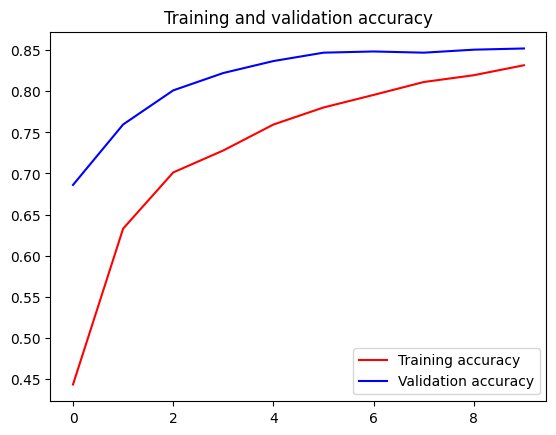

<Figure size 640x480 with 0 Axes>

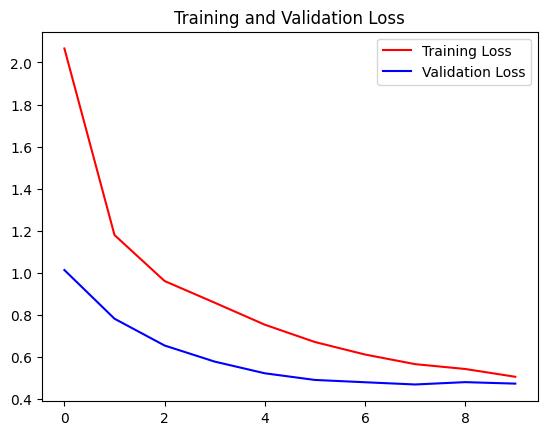

<Figure size 640x480 with 0 Axes>

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
model.evaluate(validation_generator)

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from google.colab import files
TESTDI = uploaded=files.upload()
IMG_SIZE = 256


In [ ]:
for her in TESTDI:
    pathi='/content/'+ her
    img=load_img(pathi, target_size=(256, 256))
    x=img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    predicted_label = labels[np.argmax(classes[0])]
    print(f"file {pathi} adalah {predicted_label} ")




In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(images[j])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
filesi=os.listdir(source_path_flashlight)

# Model MobilenetV2

In [ ]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x_outputs = tf.keras.layers.Dense(20, activation='softmax')(x)

model2 = Model(base_model.input, x_outputs)

model2.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
checkpoint_filepath2 = '/tmp/checkpoint2'
model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history2 = model2.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator,
                    callbacks= [model_checkpoint_callback2],
                    class_weight=weight)

Epoch 1/30
335/335 [==============================] - 161s 467ms/step - loss: 2.9058 - accuracy: 0.2497 - val_loss: 2.2139 - val_accuracy: 0.3743
Epoch 2/30
335/335 [==============================] - 152s 455ms/step - loss: 1.9711 - accuracy: 0.4216 - val_loss: 1.7354 - val_accuracy: 0.5273
Epoch 3/30
335/335 [==============================] - 156s 465ms/step - loss: 1.5556 - accuracy: 0.5126 - val_loss: 1.4267 - val_accuracy: 0.5840
Epoch 4/30
335/335 [==============================] - 151s 451ms/step - loss: 1.3415 - accuracy: 0.5649 - val_loss: 1.2373 - val_accuracy: 0.6267
Epoch 5/30
335/335 [==============================] - 153s 457ms/step - loss: 1.1984 - accuracy: 0.5972 - val_loss: 1.0885 - val_accuracy: 0.6599
Epoch 6/30
335/335 [==============================] - 151s 451ms/step - loss: 1.1040 - accuracy: 0.6248 - val_loss: 0.9856 - val_accuracy: 0.6877
Epoch 7/30
335/335 [==============================] - 153s 455ms/step - loss: 1.0273 - accuracy: 0.6468 - val_loss: 0.9076 -

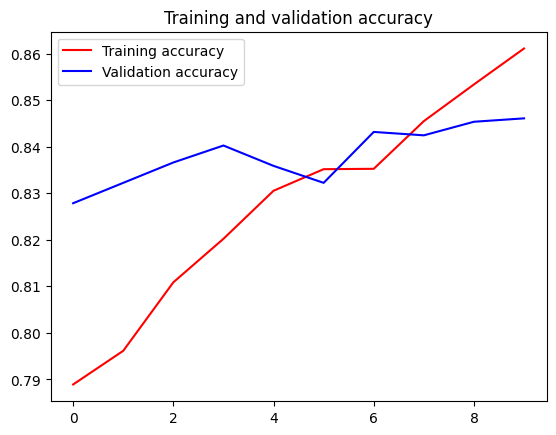

<Figure size 640x480 with 0 Axes>

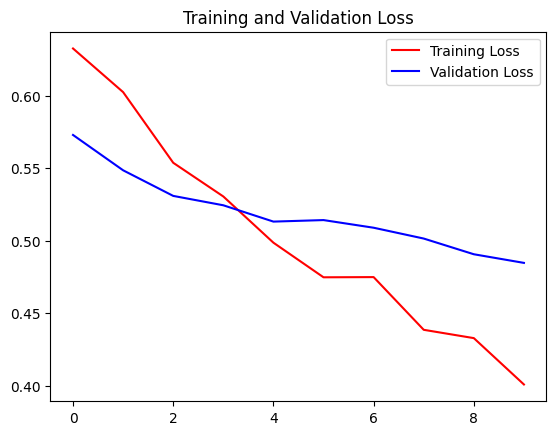

<Figure size 640x480 with 0 Axes>

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc2=history2.history['accuracy']
val_acc2=history2.history['val_accuracy']
loss2=history2.history['loss']
val_loss2=history2.history['val_loss']

epochs=range(len(acc2)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc2, 'r', label='Training accuracy')
plt.plot(epochs, val_acc2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss2, 'r', label="Training Loss")
plt.plot(epochs, val_loss2, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
RPS_SAVED_MODEL = "rolessp"

In [ ]:
tf.saved_model.save(model2, RPS_SAVED_MODEL)

In [ ]:
!rm -rf rps_saved_model

In [ ]:
%%bash -s $RPS_SAVED_MODEL
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['input_3'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 256, 256, 3)
      name: serving_default_input_3:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_7'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 29)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


2023-06-05 14:33:51.870040: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
import shutil
shutil.make_archive('hehe', 'zip', 'rolessp')

'/content/hehe.zip'

In [ ]:
from google.colab import files
files.download("/content/hehe.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
local_zip = '/content/file.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/')
zip_ref.close()

FileNotFoundError: ignored

In [ ]:
loaded = tf.saved_model.load(RPS_SAVED_MODEL)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'input_2': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_2')})
{'dense_5': TensorSpec(shape=(None, 20), dtype=tf.float32, name='dense_5')}


In [ ]:
def representative_dataset():
    for _ in range(100):
      data = np.random.rand(1, 224, 224, 3)
      yield [data.astype(np.float32)]

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(RPS_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8  # or tf.uint8
converter.inference_output_type = tf.uint8  # or tf.uint8
tflite_model = converter.convert()

In [ ]:
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from google.colab import files
TESTDI = uploaded=files.upload()
IMG_SIZE = 256

Saving botol.jpeg to botol.jpeg
Saving botol2.jpeg to botol2.jpeg
Saving contoh.jpg to contoh.jpg
Saving download.jfif to download.jfif
Saving download.jpeg to download.jpeg


In [ ]:
f = open("labels.txt", "x")

In [ ]:
f = open("labels.txt", "w")

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}
# listo =[]
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    # listo.append(value+"\n")
    f.write(value+"\n")
    print(f"{key} : {value}")
f.close()

In [ ]:
type(value)

In [ ]:
def representative_data_gen():
    for input_value, _ in test_batches.take(100):
        yield [input_value]

In [ ]:
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

In [ ]:
tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
with open('converted_model.tflite', 'rb') as fid:
    tflite_model = fid.read()

interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
# Gather results for the randomly sampled test images
from tqdm import tqdm
predictions = []
test_image = np.expand_dims(validation_generator, axis=0)
test_labels, test_imgs = [], []
for img, label in tqdm(test_image):
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))

    test_labels.append(label.numpy()[0])
    test_imgs.append(img)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# Load TFLite model and see some details about input/output

tflite_interpreter = tf.lite.Interpreter(model_path='converted_model.tflite')

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: serving_default_input_1:0
shape: [  1 256 256   3]
type: <class 'numpy.float32'>

== Output details ==
name: StatefulPartitionedCall:0
shape: [ 1 29]
type: <class 'numpy.float32'>


In [ ]:
tflite_interpreter.resize_tensor_input(input_details[0]['index'], (25, 256, 256, 3))
tflite_interpreter.resize_tensor_input(output_details[0]['index'], (25, 29))
tflite_interpreter.allocate_tensors()

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: serving_default_input_1:0
shape: [ 25 256 256   3]
type: <class 'numpy.float32'>

== Output details ==
name: StatefulPartitionedCall:0
shape: [25 29]
type: <class 'numpy.float32'>


In [ ]:
val_image_batch, val_label_batch = next(iter(validation_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (25, 256, 256, 3)


In [ ]:
tflite_interpreter.set_tensor(input_details[0]['index'], val_image_batch)

tflite_interpreter.invoke()

tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)

Prediction results shape: (25, 29)


In [ ]:
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Baterai' 'Botol Air' 'Cap' 'Carrier Bag' 'Cooking Set Hike'
 'First Aid Kit' 'Flashlight' 'Gelas Plastik' 'Hat' 'Headlamp Climbing'
 'Jaket' 'Knife' 'Lampu Tenda' 'Matras Camping' 'Outdoor Sandals'
 'Portable Gas' 'Portable Stove' 'Powerbank' 'Raincoat' 'Sarung Tangan'
 'Shoes' 'Sleeping Bag' 'Socks' 'T-Shirt' 'Tent Bag' 'Towel' 'Trash Bag'
 'Trekking Pole' 'Trousers']


In [ ]:
import pandas as pd
tflite_pred_dataframe = pd.DataFrame(tflite_model_predictions)
tflite_pred_dataframe.columns = dataset_labels

print("TFLite prediction results for the first elements")
tflite_pred_dataframe.head()

TFLite prediction results for the first elements


,Baterai,Botol Air,Cap,Carrier Bag,Cooking Set Hike,First Aid Kit,Flashlight,Gelas Plastik,Hat,Headlamp Climbing,...,Sarung Tangan,Shoes,Sleeping Bag,Socks,T-Shirt,Tent Bag,Towel,Trash Bag,Trekking Pole,Trousers
0,0.001400,0.008374,0.001820,0.008350,0.000497,0.001272,0.001733,0.001201,0.002017,0.004760,...,0.004375,0.000026,0.732074,0.001542,0.048688,0.025196,0.000350,0.031465,0.001988,0.056115
1,0.001078,0.000949,0.002693,0.007359,0.003794,0.002893,0.010253,0.001473,0.006220,0.471144,...,0.004020,0.023673,0.003596,0.001577,0.000543,0.002341,0.001758,0.003082,0.004374,0.001648
2,0.879515,0.007663,0.000253,0.000231,0.003039,0.002310,0.025565,0.017925,0.000190,0.004406,...,0.001982,0.000128,0.001360,0.000368,0.000965,0.000490,0.000420,0.001937,0.002048,0.000078
3,0.865262,0.022096,0.000674,0.000411,0.001038,0.018566,0.011679,0.025130,0.000624,0.006009,...,0.003666,0.000178,0.000682,0.000378,0.001621,0.000542,0.000327,0.004644,0.000658,0.000051
4,0.002978,0.000487,0.002631,0.003710,0.900763,0.001374,0.006200,0.000871,0.004778,0.005947,...,0.002352,0.000347,0.001936,0.000794,0.000192,0.003173,0.000293,0.003126,0.003487,0.000147


In [ ]:
predicted_ids = np.argmax(tflite_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]

IndexError: ignored

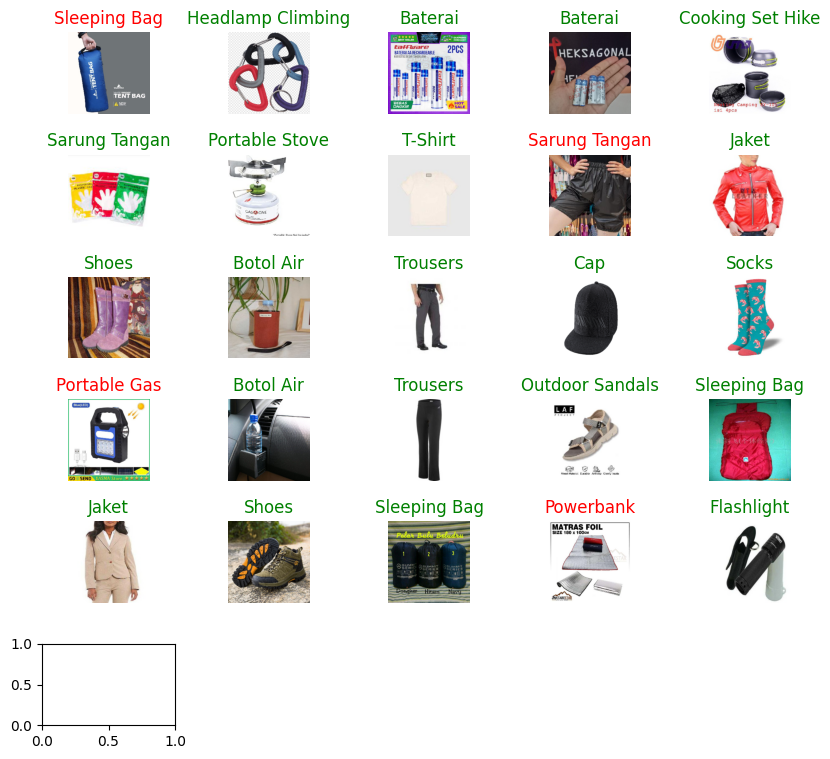

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")